## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [2]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [11]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4532 - accuracy: 0.4902 - val_loss: 1.7819 - val_accuracy: 0.3955
Epoch 50/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.4471 - accuracy: 0.4917 - val_loss: 1.6749 - val_accuracy: 0.4336
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 7s 146us/step - loss: 0.3936 - accuracy: 0.8580 - val_loss: 2.2793 - val_accuracy: 0.5201
Epoch 48/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.4060 - accuracy: 0.8545 - val_loss: 2.1800 - val_accuracy: 0.5259
Epoch 49/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.3865 - accuracy: 0.8597 - val_loss: 2.3064 - val_accuracy: 0.5208
Epoch 50/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.3761 - accuracy: 0.8654 - val_loss: 2.3157 - val_accuracy: 0.5207
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.9442 - accuracy: 0.6686 - val_loss: 1.3894 - val_accuracy: 0.5220
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.9352 - accuracy: 0.6721 - val_loss: 1.3655 - val_accuracy: 0.5310
Epoch 47/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.9238 - accuracy: 0.6786 - val_loss: 1.3761 - val_accuracy: 0.5253
Epoch 48/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.9083 - accuracy: 0.6810 - val_loss: 1.4220 - val_accuracy: 0.5205
Epoch 49/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.9013 - accuracy: 0.6880 - val_loss: 1.3825 - val_accuracy: 0.5312
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8857 - accuracy: 0.6895 - val_loss: 1.3736 - val_accuracy: 0.5309
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5727 - accuracy: 0.4506 - val_loss: 1.5873 - val_accuracy: 0.4402
Epoch 44/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5682 - accuracy: 0.4524 - val_loss: 1.5817 - val_accuracy: 0.4481
Epoch 45/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5634 - accuracy: 0.4529 - val_loss: 1.5821 - val_accuracy: 0.4467
Epoch 46/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5592 - accuracy: 0.4549 - val_loss: 1.5758 - val_accuracy: 0.4491
Epoch 47/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5547 - accuracy: 0.4577 - val_loss: 1.5718 - val_accuracy: 0.4522
Epoch 48/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5509 - accuracy: 0.4584 - val_loss: 1.5678 - val_accuracy: 0.4497
Epoch 49/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5460 - accuracy: 0.4599

Epoch 41/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.9577 - accuracy: 0.3153 - val_loss: 1.9546 - val_accuracy: 0.3216
Epoch 42/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9540 - accuracy: 0.3159 - val_loss: 1.9509 - val_accuracy: 0.3239
Epoch 43/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.9504 - accuracy: 0.3169 - val_loss: 1.9473 - val_accuracy: 0.3251
Epoch 44/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.9469 - accuracy: 0.3191 - val_loss: 1.9438 - val_accuracy: 0.3242
Epoch 45/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9434 - accuracy: 0.3204 - val_loss: 1.9404 - val_accuracy: 0.3257
Epoch 46/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.9401 - accuracy: 0.3213 - val_loss: 1.9371 - val_accuracy: 0.3280
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.9368 - accuracy: 0.3235

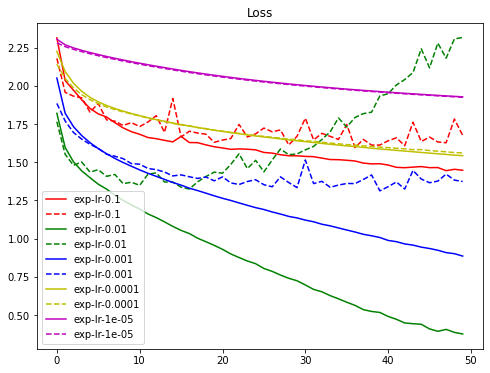

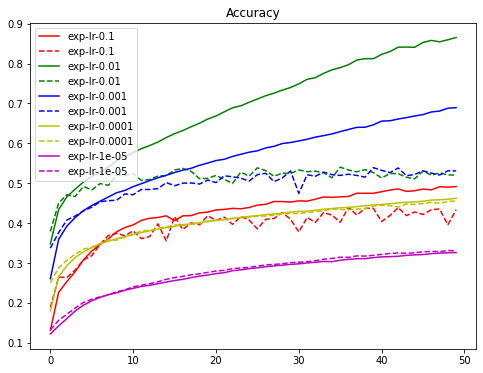

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現